 # Lecture 5: Conjugate Families
 
 ## Instructor: Dr. Hu Chuan-Peng  


## 回顾对先验的选择

在lec3 与 lec4 中，我们使用了Beta分布来反映我们对参数$\pi$的先验认识。

我们知道若先验可以用$Beta(\alpha,\beta)$描述，收集到的数据可以用$Bin(n, \pi)$描述，后验分布就可以用$Beta(\alpha+y, \beta+n-y)$描述

在lec3中，我们介绍过共轭先验的概念(conjugate prior):

* 如果后验分布与先验分布属于同类，先验分布被称为似然函数的共轭先验

事实上，Beta-Binomial分布这类先验-数据组合，被称为共轭家族(conjugate family)，利用这些家族来获得后验，既有计算上的便利性，由于我们明确知道后验的分布类型，解释起来也很容易。

**非共轭先验会带来什么**

让我们再回到纣王支持率的例子，考虑一个非共轭先验的状况

假如此时$f(\pi)$并不满足$beta$分布，而是：
$$
\begin{equation}
f(\pi)=e-e^\pi\; \text{ for } \pi \in [0,1].
\tag{5.1}
\end{equation}
$$

![](https://www.bayesrulesbook.com/bookdown_files/figure-html/non-conjugate-1.png)

但似然函数仍是一个二项分布，假设我们在50人的投票结果中观察到10人投了支持票，那么似然函数可以写成：
$$
L(\pi | y=10) = \left(\!\begin{array}{c} 50 \\ 10 \end{array}\!\right) \pi^{10} (1-\pi)^{40} \; \; \text{ for } \pi \in [0,1]
$$

后验可以写成：
$$
f(\pi | y = 10) \propto f(\pi) L(\pi | y = 10) = (e-e^\pi) \cdot \binom{50}{10} \pi^{10} (1-\pi)^{40}.
$$

加入归一化常数后：

$$
\begin{equation}
f(\pi|y=10)= \frac{(e-e^\pi)  \pi^{10} (1-\pi)^{40}}{\int_0^1(e-e^\pi)  \pi^{10} (1-\pi)^{40}d\pi}  \; \; \text{ for } \pi \in [0,1].
\tag{5.2}
\end{equation}
$$

-------------------------

* 在有共轭先验$Beta(45,55)$的情况下，后验分布可以简洁地写为$Beta(75,75)$  

> 但在非共轭先验的情况下，该后验分布的结果变得很繁琐。

* 在lec4中，我们可以直接对比后验和先验在表达式上的变化，从而发现后验结合了来自先验和似然的信息。

> 但在非共轭先验的情况下，我们很难从这个后验表达式中获得类似的直觉。

## Gamma-Poisson conjugate family

### The Poisson data model

**诈骗电话**

假设有一位女士反映近来她常常收到诈骗电话

她觉得平均下来，每天都会接到5通诈骗电话，并且这个数字大概在2-7通电话之间波动

我们将她每天收到的诈骗电话**平均值**设为$\lambda$，通常我们会：
1. 为$\lambda$选择一个合适的先验
2. 接着收集数据，并且选择一个合适的数据模型
3. 结合先验与数据，更新我们对$\lambda$的信念

不过在这一节中，我们需要先假定似然函数$L(\theta|y)$是已知的，再去选取一个合适的先验分布$p(\theta)$，使得后验分布与先验分布具有相同的数学形式。

**Poisson分布**  

假设$\lambda$是已知的，而我们相对接下来每天可能收到的诈骗电话$(Y_1,Y_2,\ldots,Y_n)$进行估计

$$  
f(Y_n|\lambda)
$$

> * 注意，在这里，我们并不能使用二项模型来描述事件的分布情况
> * 在二项模型中，我们需要有事件重复的总次数n，和事件成功发生的概率p
>$$ f(y|\pi) = P(Y=y | \pi) = \binom{n}{y} \pi^y (1-\pi)^{n-y}  $$  
> * 在这里，我们已知的是$\lambda$，诈骗电话数的平均值

-------------------------

我们可以使用**Poisson分布**来表示在给定$\lambda$下，可能接到某诈骗电话数的概率

**Poisson分布**的概率质量函数(pmf)可以表示为：

$$f(y) =  \frac{\lambda^{y}e^{-\lambda}}{y!}$$

* $\lambda$是事情发生比率(event rate)，可以简单理解为某单位时间内，某事件发生的平均次数
* y是在一定时间间隔中事件发生的次数


> poisson分布对数据做出的假设：
> * 事件发生比率($\lambda$)是常数
> * 事件的发生是相互独立的

在这个例子中，每天收到的诈骗电话平均值是固定的，并且前一天接到的诈骗电话数不会影响后一天接到的诈骗电话数

**Poisson分布图示**

下图展示了不同$\lambda$下，事件发生y次的可能性分布

In [1]:
# @title setup
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import gamma
from ipywidgets import interact
from matplotlib.lines import Line2D
import seaborn as sns


In [2]:
x = np.linspace(0, 12, 13) 
st.poisson.pmf(x,12)

array([6.14421235e-06, 7.37305482e-05, 4.42383289e-04, 1.76953316e-03,
       5.30859947e-03, 1.27406387e-02, 2.54812775e-02, 4.36821900e-02,
       6.55232849e-02, 8.73643799e-02, 1.04837256e-01, 1.14367916e-01,
       1.14367916e-01])

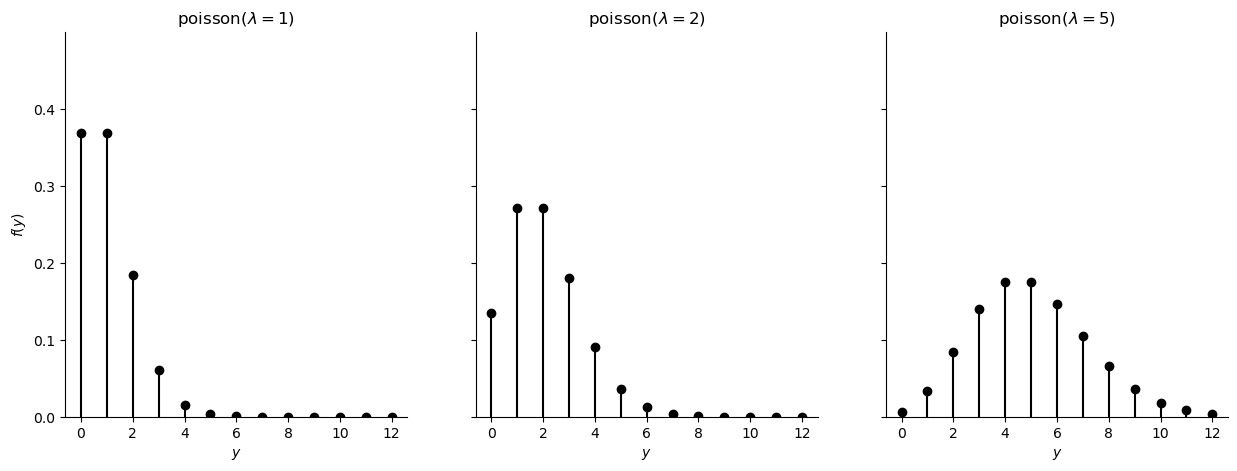

In [5]:
y = np.linspace(0, 12, 13)        # 生成事件发生次数的数据(0，1，2...12)

mu = [1,2,5]                      # 生成三种lambda

fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)   # 生成三个子图

for i,m in enumerate(mu):
    y_p = st.poisson.pmf(y,m)     # 在给定mu下，y发生的概率
    axes[i].stem(y,y_p,           # 画图
                 linefmt='black',
                 bottom=-1)
    axes[i].set_title(f"poisson($\lambda=${m})")  # 设置标题
    axes[i].set_xlabel('$y$')                     # 设置x轴标题


axes[0].set_ylabel('$f(y)$')                      # 设置y轴标题
plt.ylim(0, 0.5)                                  # 设置y轴范围
plt.yticks(np.arange(0, 0.5, 0.1))                # 设置y轴刻度
sns.despine()

**使用Poisson分布模拟数据分布**  

同样地，我们使用Poisson分布来模拟每天可能接到的诈骗电话数(y)：
$$
Y_i | \lambda \stackrel{ind}{\sim} \text{Pois}(\lambda)
$$

$$
f(y_i|\lambda) =  \frac{\lambda^{y_i}e^{-\lambda}}{y_i!}\;\; \text{ for } y_i \in \{0,1,2,\ldots\}
$$

-------

🤔如果我们一共收集了四天的数据，此时的似然函数怎么写？


我们将每天收到的诈骗电话数$(Y_1, Y_2, \ldots, Y_n)$组合为一个向量$\vec{y} = (y_1,y_2,\ldots,y_n)$

在给定的$\lambda$下，$\vec{y}$发生的可能性可以表示为：

$$
f(\vec{y} | \lambda) = \prod_{i=1}^n f(y_i | \lambda) = f(y_1 | \lambda) \cdot f(y_2 | \lambda) \cdot \cdots \cdot f(y_n | \lambda) 
$$

> 注意：由于每天接到的诈骗电话数是互不影响的，所以我们可以直接相乘：$P(A \cap B) = P(A)P(B)$

------

我们可以把公式代入并进行整理，最后可得到

$$
\begin{split}
f(\vec{y} | \lambda) =\frac{\lambda^{\sum y_i}e^{-n\lambda}}{\prod_{i=1}^n y_i!} \\
\end{split}
$$

当n很大时，$\prod y_i!$的计算将变得麻烦，同样的我们可以暂时忽略分母

$$
L(\lambda | \vec{y}) = \frac{\lambda^{\sum y_i}e^{-n\lambda}}{\prod_{i=1}^n y_i!} \propto \lambda^{\sum y_i}e^{-n\lambda} \;\; \text{ for } \lambda > 0
$$




---------------

**具体计算**

$$
\begin{split}
f(\vec{y} | \lambda) 
& = \frac{\lambda^{y_1}e^{-\lambda}}{y_1!} \cdot \frac{\lambda^{y_2}e^{-\lambda}}{y_2!} \cdots \frac{\lambda^{y_n}e^{-\lambda}}{y_n!} \\
& = \frac{\left[\lambda^{y_1}\lambda^{y_2} \cdots \lambda^{y_n}\right] \left[e^{-\lambda}e^{-\lambda} \cdots e^{-\lambda}\right]}{y_1! y_2! \cdots y_n!} \\
& =\frac{\lambda^{\sum y_i}e^{-n\lambda}}{\prod_{i=1}^n y_i!} \\
\end{split}
$$

-----------------


**代入具体数据**

这位女士在四天内收到的诈骗电话数分别是6，2，2，1，我们可以将其组合成一个向量$\vec{y} = (y_1,y_2,y_3,y_4) = (6,2,2,1)$

代入公式：
$$
L(\lambda | \vec{y}) = \frac{\lambda^{\sum y_i}e^{-n\lambda}}{\prod_{i=1}^n y_i!} \;\;\;\;\;\;\;\;\;\sum_{i=1}^4y_i = 6 + 2 + 2 + 1 = 11
$$

可得：
$$
L(\lambda | \vec{y}) = \frac{\lambda^{11}e^{-4\lambda}}{6!\times2!\times2!\times1!} \propto \lambda^{11}e^{-4\lambda} \;\;\;\; \text{ for } \lambda > 0 
$$

**Poisson似然函数图示**

我们可以把该似然函数画出来，横轴为不同的$\lambda$，纵轴为在不同的$\lambda$下，$\vec{y}$发生的似然$L(\lambda | \vec{y})$：

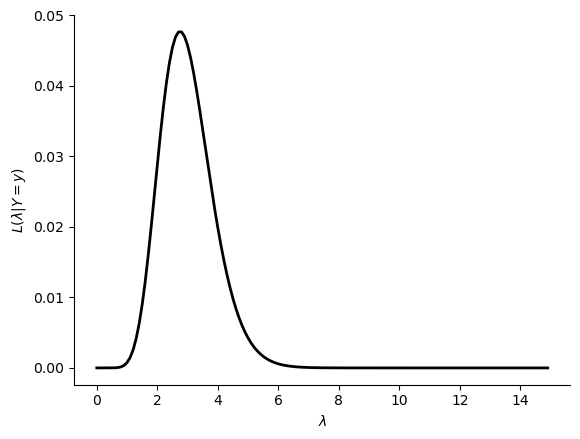

In [9]:
# 定义似然函数，由于该似然函数不能通过调用已有的函数获得，因此我们根据得到的公式定义一个

def poisson_likelihood(y):
    lambdas = np.arange(0, 15, 0.1)
    
    # Calculate the Poisson likelihood for each lambda
    likelihood_values = np.exp(-len(y) * lambdas) * np.power(lambdas, np.sum(y)) / np.prod([np.math.factorial(val) for val in y])

    return lambdas, likelihood_values

#传入需要的参数vec y
observed_data = [6,2,2,1]
lambdas, likelihood_values = poisson_likelihood(observed_data)
likelihood_values /= np.sum(likelihood_values)

plt.plot(lambdas, likelihood_values, color='black', lw=2)
plt.xlabel('$\lambda$')
plt.ylabel('$L(\lambda | Y=y)$')
sns.despine()

###  Potential priors

**🤔思考：**

我们已经得到了似然函数的公式：
$$
L(\lambda | \vec{y}) = \frac{\lambda^{\sum y_i}e^{-n\lambda}}{\prod_{i=1}^n y_i!} \propto \lambda^{11}e^{-4\lambda}
$$


以下哪种先验分布可以和poisson似然一起构成共轭先验

1. Gamma模型：$f(\lambda) \propto \lambda^{s - 1} e^{-r \lambda}$

2. Weibull模型：$f(\lambda) \propto \lambda^{s - 1} e^{(-r \lambda)^s}$

3. "F"模型：$f(\lambda) \propto \lambda^{\frac{s}{2} - 1}\left( 1 + \lambda\right)^{-s}$




### Gamma prior

$\lambda$ 是一个可以取任何正值的连续变量，使用Gamma分布对它进行模拟，Gamma分布由两个超参数s,r指定：

$$\lambda \sim \text{Gamma}(s, r)$$

其pdf为：
$$
f(\lambda) = \frac{r^s}{\Gamma(s)} \lambda^{s-1} e^{-r\lambda} \;\; \text{ for } \lambda > 0.
$$

In [ ]:
#pip install ipywidgets

In [11]:
# @title interactive gamma
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import gamma
from ipywidgets import interact
import seaborn as sns


x = np.linspace(0, 20, 1000)
def plot_beta(a, b):
    y = gamma.pdf(x, a=a, scale=1/b)
    plt.plot(x, y, color='black', lw=2)
    plt.title(f"Gamma({a}, {b})")
    plt.xlabel('$\lambda$')
    plt.ylabel('$f(\lambda)$')
    plt.gca().yaxis.set_major_formatter('{x:1.1f}')
    plt.xlim(0, 8)
    plt.xticks(np.arange(0, 9, 2))
    plt.yticks(np.arange(0, 2.5, 0.5))
    sns.despine()

In [12]:
ipywidgets.interact(plot_beta, a=(0, 10), b=(0, 10))

interactive(children=(IntSlider(value=5, description='a', max=10), IntSlider(value=5, description='b', max=10)…

<function __main__.plot_beta(a, b)>

已知$\lambda$的平均值为5，我们选用$\lambda \sim \text{Gamma}(10,2)$作为$\lambda$的先验

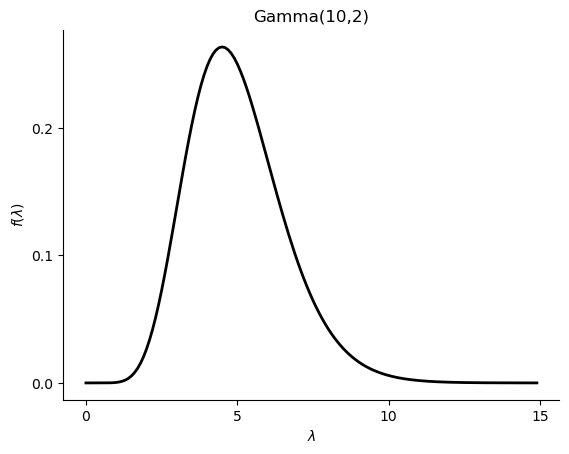

In [23]:
x = np.arange(0, 15, 0.1)
prior_y = st.gamma.pdf(x, a=10, scale=1/2)
plt.plot(x, prior_y, color='black', lw=2)
plt.title(f"Gamma(10,2)")
plt.xlabel('$\lambda$')
plt.ylabel('$f(\lambda)$')
plt.gca().yaxis.set_major_formatter('{x:1.1f}')
plt.xticks(np.arange(0, 16, 5))
plt.yticks(np.arange(0, 0.3, 0.1))
sns.despine()

### Gamma-Poisson conjugacy
由于Gamma先验分布和Poisson似然来自一组共轭家族，既二者组成的后验分布同样也是Gamma分布，具有计算上的便利性，因此我们可以直接代入公式来计算后验：

- Gamma-Poisson 家族的公式表达：
> $先验：\lambda \sim \text{Gamma}(s, r) \\
似然：Y_i | \lambda \stackrel{ind}{\sim} \text{Pois}(\lambda) \\
后验：\lambda|\vec{y} \; \sim \; \text{Gamma}\left(s + \sum y_i, \; r + n\right)$

- 代入当前数据可得：
> $先验：\lambda \sim \text{Gamma}(10, 2)$

> $\vec{y} = (y_1,y_2,y_3,y_4) = (6,2,2,1); \;\;\;\; $

> $似然：L(\lambda | \vec{y}) = \frac{\lambda^{11}e^{-4\lambda}}{6!\times2!\times2!\times1!} \propto \lambda^{11}e^{-4\lambda}$

> $s + \sum y_i = 10 + 11; \;\;\;\; r + n = 2 + 4 \\
后验：\lambda|\vec{y} \; \sim \; \text{Gamma}(21,6)$


我们可以将这三者画出来：

在收集了四天的数据后，我们对$\lambda$的信念发生了更新，

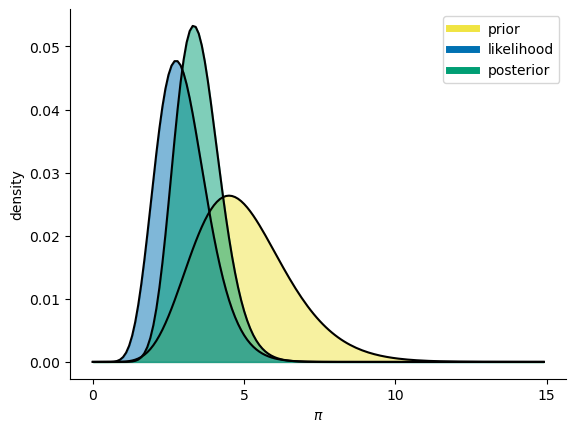

In [33]:
x = np.arange(0, 15, 0.1)
prior_y = st.gamma.pdf(x, a=10, scale=1/2) / np.sum(st.gamma.pdf(x, a=10, scale=1/2))
posterior = st.gamma.pdf(x, a=21, scale=1/6) / np.sum(st.gamma.pdf(x, a=21, scale=1/6))

observed_data = [6,2,2,1]
lambdas, likelihood_values = poisson_likelihood(observed_data)

likelihood_values /= likelihood_values.sum()

plt.plot(x, prior_y, color='black')
plt.fill_between(x, prior_y, color="#f0e442", alpha=0.5)
plt.plot(lambdas, likelihood_values, color='black')
plt.fill_between(lambdas, likelihood_values, color="#0071b2", alpha=0.5)
plt.plot(x, posterior, color='black')
plt.xticks(np.arange(0, 16, 5))
plt.fill_between(x, posterior, color="#009e74", alpha=0.5)

# 设置 x 和 y 轴标签
plt.xlabel('$\lambda$')
plt.ylabel('density')

# 创建自定义图例
custom_lines = [Line2D([], [], color="#f0e442", lw=5),
                Line2D([], [], color="#0071b2", lw=5),
                Line2D([], [], color="#009e74", lw=5)]
        
# 将图例放置在子图外部的右上角
plt.legend(custom_lines, ['prior', 'likelihood', 'posterior'], loc='upper right', bbox_to_anchor=(1, 1))

# 移除图的上、右边框线
sns.despine()